In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
yt = label_binarize(target, classes=[0, 1, 2])
n_classes = yt.shape[1]
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.60,random_state=0)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [4]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))
svm_clf = SVC(probability = True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')


LogisticRegression 0.9444444444444444
RandomForestClassifier 0.9444444444444444
SVC 0.9333333333333333
VotingClassifier 0.9333333333333333


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=50, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, Y_train)
Y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

BaggingClassifier 0.9555555555555556


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, Y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

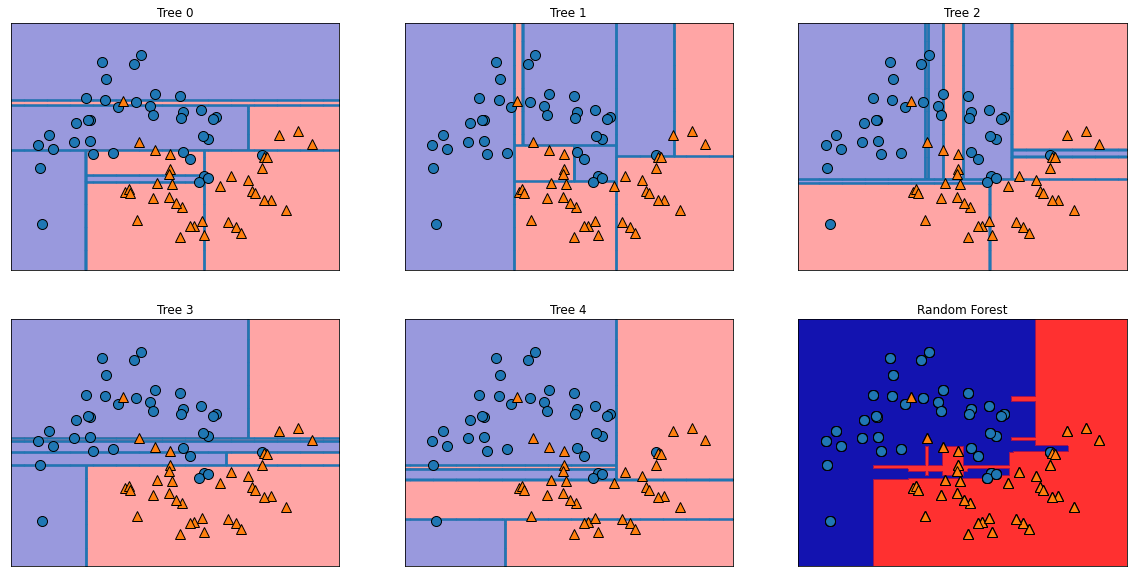

In [7]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, Y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True,
    ax=axes[-1, -1],alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], Y_train)
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(X_train, Y_train)
# Predict observation's class
model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, Y_test)))
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)
# Train model
model_entropy = randomforest_entropy.fit(X_train, Y_train)

Accuracy on training set: 1.000
Accuracy on test set: 0.880


In [9]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.60,random_state=0)
# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, Y_test)))

Accuracy on training set: 0.858
Accuracy on test set: 0.166


In [14]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)
# Train model
model = adaboost.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.962
